# Algorithm for Optimal Camera Placement

This algorithm uses open-source dataset from Kaggle (https://www.kaggle.com/c/sf-crime) of crime in San Francisco from 2003 to 2015 to analyze regions that need cameras to be installed.

In [1]:
### DATA IMPORT
import csv

incidents = []
with open('incidents.csv') as csvfile:
    reader = csv.reader(csvfile)
    counter = 0
    for row in reader:
        if counter > 0:
            (x, y) = (float(row[5]), float(row[6]))
            incidents.append(row[:5])
            incidents[counter].extend((x, y))
        else:
            incidents.append(row)
        counter += 1

In [2]:
### CRIMES W/ WEAPONS
severe_incidents = [incidents[0]]

for incident in incidents:
    if incident[2].find('GUN') > -1 or incident[2].find('KNIFE') > -1 or incident[2].find('WEAPON') > -1:
        severe_incidents.append(incident)

In [3]:
### DISPLAY DATA
import pandas as pd

display_num = 15

pd.DataFrame(severe_incidents)[:display_num+1]

,0,1,2,3,4,5,6
0,﻿Dates,Category,Descript,Resolution,Address,X,Y
1,5/13/15 04:45,ROBBERY,"ROBBERY, ATM, GUN",NONE,1500 Block of MARKET ST,-122.42,37.7747
2,5/12/15 16:26,ROBBERY,ATTEMPTED ROBBERY WITH A DEADLY WEAPON,NONE,1000 Block of MARKET ST,-122.411,37.7818
3,5/12/15 11:20,ROBBERY,ROBBERY OF A CHAIN STORE WITH A KNIFE,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411,37.7813
4,5/12/15 11:20,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411,37.7813
5,5/3/15 17:05,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,"ARREST, BOOKED",900 Block of MARKET ST,-122.408,37.7836
6,5/3/15 17:05,ROBBERY,ROBBERY OF A CHAIN STORE WITH A KNIFE,"ARREST, BOOKED",900 Block of MARKET ST,-122.408,37.7836
7,5/2/15 17:15,WEAPON LAWS,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,"ARREST, BOOKED",2400 Block of MARKET ST,-122.436,37.7625
8,5/1/15 19:44,ROBBERY,"ROBBERY, ARMED WITH A GUN",NONE,800 Block of MARKET ST,-122.408,37.7842
9,5/1/15 15:35,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,NONE,3RD ST / MARKET ST,-122.403,37.7876


In [4]:
### ESRI MAP
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders, geocode
from IPython.display import display
import ipywidgets

gis = GIS()
sf_map = gis.map('-122.4302653, 37.78282262', zoomlevel=14)
    
sf_map

In [5]:
### CRIME MAPPING
incident_symbol = {
    "type": "esriSMS",
    "style": "esriSMSCircle",
    "color": [244, 66, 66, 5],
    "size": 12,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0
}

for incident in severe_incidents[1:]:
    popup = { 
        "title" : incident[2], 
        "content" : 'Date: ' + incident[0] + ' at ' + incident[4]
    }
    sf_map.draw({'x': incident[5], 'y': incident[6]}, popup, incident_symbol)

In [6]:
### LAMP LOCATIONS
lights = []

with open('lamp_post_locations.csv') as csvfile:
    reader = csv.reader(csvfile)
    counter = 0
    for row in reader:
        if counter > 0:
            lights.append((float(row[0]), float(row[1])))
        counter += 1

In [7]:
### LAMP MAPPING
lamp_symbol = {
    "type": "esriSMS",
    "style": "esriSMSCircle",
    "color": [244, 244, 66, 255],
    "size": 5,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0
}

for light in lights:
    popup = { 
        "title" : "Lamp post"
    }
    sf_map.draw({'x': light[0], 'y': light[1]}, popup, lamp_symbol)

In [8]:
### CAMERA SYSTEM SPECIFICATIONS
view_radius = 10 # maximum view range in meters
blind_radius = 1.5 # blind spot under the lamp posts in meters

price = 200 # in dollars

In [9]:
### DISTANCE CALCULATION
import math

def dist(lat1, lon1, lat2, lon2):
    R = 6371e3
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    d_phi = math.radians(lat2-lat1)
    d_lambda = math.radians(lon2-lon1)
    
    a = math.sin(d_phi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(d_lambda/2)**2
    c = 2 * math.atan2(a**.5, (1-a)**.5)
    d = R * c
    
    return d

    
dist(-122.5643, 37.5645, -123.5256, 36.6346)

120848.2944454987

In [39]:
### OPTIMAL LOCATION OF CAMERAS
from itertools import repeat

def merge(arr1, arr2):
    newArr = []
    for i in range(len(arr1)):
        newArr.append(max(arr1[i], arr2[i]))
    return newArr

opt_cam_coverage = ['Filler']

def optimal_camera_placement(count):
    print("Calculating efficiency for", count, "camera" + ("s" if count > 1 else ""), end='\r')
    covered_total = 0
    camera_locations = []
    covered_incidents = list(repeat(0, len(severe_incidents))) # creating a list of incidents cameras cover

    for x in range(count):
        covered_max = 0
        best_light = 1
        
        covered_incidents_best = list(repeat(0, len(severe_incidents)))
        covered_incidents_temp = list(repeat(0, len(severe_incidents)))

        for i in range(1, len(lights)):
            covered = 0
            for j in range(1, len(severe_incidents)):
                if covered_incidents[j] == 0 and dist(severe_incidents[j][5], severe_incidents[j][6], lights[i][0], lights[i][1]) <= view_radius:
                    covered += 1
                    covered_incidents_temp[j] = 1

            if covered > covered_max:
                covered_max = covered
                covered_incidents_best = covered_incidents_temp
                best_light = i
            covered_incidents_temp = list(repeat(0, len(severe_incidents)))
            
        covered_total += covered_max  
        covered_incidents = merge(covered_incidents, covered_incidents_best)
        camera_locations.append(lights[best_light])
        
    return camera_locations, covered_total

def opt_cam_placement(count):
    print("Calculating efficiency for", count, "camera" + ("s" if count > 1 else ""), end='\r')
            
    covered_incidents = list(repeat(0, len(severe_incidents))) # creating a list of incidents cameras cover
          
    if count > 1:
        covered_incidents = opt_cam_coverage[count-1][0]

    covered_max = 0        
    covered_total = sum(covered_incidents)
    best_light = 1
        
    covered_incidents_temp = list(repeat(0, len(severe_incidents)))
    covered_incidents_best = list(repeat(0, len(severe_incidents)))
    for i in range(1, len(lights)):
        covered = 0
        for j in range(1, len(severe_incidents)):
            if covered_incidents[j] == 0 and dist(severe_incidents[j][5], severe_incidents[j][6], lights[i][0], lights[i][1]) <= view_radius:
                covered += 1
                covered_incidents_temp[j] = 1

        if covered > covered_max:
            covered_max = covered
            covered_incidents_best = covered_incidents_temp
            best_light = i
        
        covered_incidents_temp = list(repeat(0, len(severe_incidents)))
            
    covered_total += covered_max
    opt_cam_coverage.append((merge(covered_incidents, covered_incidents_best), lights[best_light])) if len(opt_cam_coverage) <= count else print()
        
    return [cam_config[1] for cam_config in opt_cam_coverage], covered_total

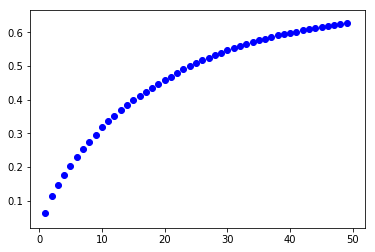

In [52]:
### COST CALCULATION
import matplotlib.pyplot as plt

opt_cam_coverage = ['Filler']

for i in range(1, 50):
    plt.scatter(i, 0.8 * opt_cam_placement(i)[1] / len(severe_incidents), c="blue")
    
cam_config = []
for config in opt_cam_coverage[1:][0]:
    cam_config.append(sum(config))
    
plt.show()

In [50]:
### CAMERA MAPPING
camera_locations, covered_total = opt_cam_placement(30) # positioning 30 cameras

camera_symbol = {
    "type": "esriSMS",
    "style": "esriSMSCircle",
    "color": [66, 134, 244, 255],
    "size": 7,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0
}

for camera in camera_locations[1:]:
    popup = { 
        "title" : "360° Camera Set-up"
    }
    sf_map.draw({'x': camera[0], 'y': camera[1]}, popup, camera_symbol)
    
print("Estimated efficiency: ", 0.8 * covered_total / len(severe_incidents))

Calculating efficiency for 30 cameras
Estimated efficiency:  0.5472118959107808


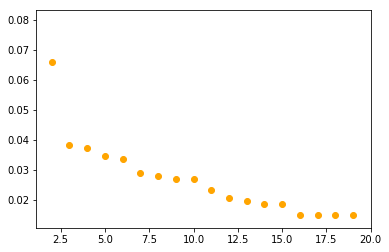

In [56]:
for i in range(2, 20):
    plt.scatter(i, (sum(opt_cam_coverage[i][0]) - sum(opt_cam_coverage[i-1][0])) / len(severe_incidents), c="orange")
 
    
plt.show()